# Session 4: Pandas and Visualization
MSA 8010: Data Programming

### Agenda
1. Pandas
1. Visualization

Sources:
- https://pandas.pydata.org/docs/getting_started/index.html#getting-started
- https://swcarpentry.github.io/python-novice-inflammation/02-numpy/index.html

In [1]:
#Creating a DataFrame of some Titanic passengers
import pandas as pd
df = pd.DataFrame(
    {
        "Name": [
            "Braund, Mr. Owen Harris",
            "Allen, Mr. William Henry",
            "Bonnell, Miss. Elizabeth",
        ],
        "Age": [22, 35, 58],
        "Sex": ["male", "male", "female"],
    }
)
df.head()

,Name,Age,Sex
0,"Braund, Mr. Owen Harris",22,male
1,"Allen, Mr. William Henry",35,male
2,"Bonnell, Miss. Elizabeth",58,female


#### DataFrame

- Each column in a `DataFrame` is a `Series`
- When selecting a single column of a pandas DataFrame, the result is a pandas Series. 

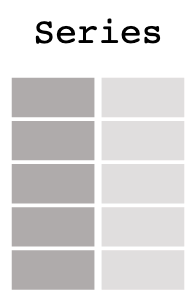

In [2]:
#To select the column, use the column label in between square brackets []
df["Age"]

0    22
1    35
2    58
Name: Age, dtype: int64

In [3]:
# Maximum value in a Series
print(df["Age"].max())

58


In [4]:
#Average
print(df["Age"].mean())
print(format(df["Age"].mean(), ".2f"))
print(int(df["Age"].mean()))

38.333333333333336
38.33
38


In [5]:
#Download CSV from https://github.com/pandas-dev/pandas/tree/master/doc/data/titanic.csv
titanic = pd.read_csv("data/titanic.csv")
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
#View one row
titanic.iloc[3]

PassengerId                                               4
Survived                                                  1
Pclass                                                    1
Name           Futrelle, Mrs. Jacques Heath (Lily May Peel)
Sex                                                  female
Age                                                      35
SibSp                                                     1
Parch                                                     0
Ticket                                               113803
Fare                                                   53.1
Cabin                                                  C123
Embarked                                                  S
Name: 3, dtype: object

In [7]:
#Slicing (similar to Numpy)
df.iloc[3:5, 0:2]

,Name,Age


In [8]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [9]:
print("passengers=", len(titanic))
print("average age=", format(titanic["Age"].mean(), ".2f"))
print("maximum age=", titanic["Age"].max())

passengers= 891
average age= 29.70
maximum age= 80.0


### DataFrame: Select a subset

In [10]:
above_35 = titanic[titanic["Age"] > 35]
print("passengers=", len(above_35))
above_35.head()

passengers= 217


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
13,14,0,3,"Andersson, Mr. Anders Johan",male,39.0,1,5,347082,31.2750,NaN,S
15,16,1,2,"Hewlett, Mrs. (Mary D Kingcome)",female,55.0,0,0,248706,16.0000,NaN,S


In [11]:
#Dictionary to DataFrame
d = {
    "one": pd.Series([1.0, 2.0, 3.0], index=["a", "b", "c"]),
    "two": pd.Series([1.0, 2.0, 3.0, 4.0], index=["a", "b", "c", "d"]),
}
print(type(d))

<class 'dict'>


In [12]:
df = pd.DataFrame(d)
df

,one,two
a,1.0,1.0
b,2.0,2.0
c,3.0,3.0
d,NaN,4.0


### Adding new Columns

In [13]:
#Add a new column
df["three"] = df["one"] * df["two"]
df

,one,two,three
a,1.0,1.0,1.0
b,2.0,2.0,4.0
c,3.0,3.0,9.0
d,NaN,4.0,NaN


In [14]:
# Adding a new Boolean column
df["flag"] = df["one"] > 2
df

,one,two,three,flag
a,1.0,1.0,1.0,False
b,2.0,2.0,4.0,False
c,3.0,3.0,9.0,True
d,NaN,4.0,NaN,False


### Deleting Columns

In [15]:
#Deletion
del df["two"]
three = df.pop("three")
print(three)
df

a    1.0
b    4.0
c    9.0
d    NaN
Name: three, dtype: float64


,one,flag
a,1.0,False
b,2.0,False
c,3.0,True
d,NaN,False


In [16]:
df["four"] = 4 #Scalar value propagates
df["five"] = df["one"][:2] #Series convert to index positions
df

,one,flag,four,five
a,1.0,False,4,1.0
b,2.0,False,4,2.0
c,3.0,True,4,NaN
d,NaN,False,4,NaN


### Exercise #1

Create a function, `half_df`, that takes a dataframe and returns the first half of rows, and the first half of columns.

### Concat row-wise (axis=0)
- We want to increase numnber of rows, and don't touch columns
<img src="merging_concat_basic.png" />

In [17]:
df1 = pd.DataFrame(
    {
        "A": ["A0", "A1", "A2", "A3"],
        "B": ["B0", "B1", "B2", "B3"],
        "C": ["C0", "C1", "C2", "C3"],
        "D": ["D0", "D1", "D2", "D3"],
    }, index=[0, 1, 2, 3],
)
df2 = pd.DataFrame(
    {
        "A": ["A4", "A5", "A6", "A7"],
        "B": ["B4", "B5", "B6", "B7"],
        "C": ["C4", "C5", "C6", "C7"],
        "D": ["D4", "D5", "D6", "D7"],
    }, index=[4, 5, 6, 7],
)
df3 = pd.DataFrame(
    {
        "A": ["A8", "A9", "A10", "A11"],
        "B": ["B8", "B9", "B10", "B11"],
        "C": ["C8", "C9", "C10", "C11"],
        "D": ["D8", "D9", "D10", "D11"],
    }, index=[8, 9, 10, 11],
)

In [18]:
#axis: The axis to concatenate along.
#0: columns (default)
#1: rows
result = pd.concat([df1,df2,df3], axis=0)
result

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3
4,A4,B4,C4,D4
5,A5,B5,C5,D5
6,A6,B6,C6,D6
7,A7,B7,C7,D7
8,A8,B8,C8,D8
9,A9,B9,C9,D9


### Concat column-wise (axis=1)
- We want to increase number of columns, and don't touch rows

<img src="merging_concat_axis1.png" />

In [19]:
df4 = pd.DataFrame(
    {
        "B": ["B2", "B3", "B6", "B7"],
        "D": ["D2", "D3", "D6", "D7"],
        "F": ["F2", "F3", "F6", "F7"],
    },
    index=[2, 3, 6, 7],
)
result = pd.concat([df1, df4], axis=1)
result

,A,B,C,D,B,D,F
0,A0,B0,C0,D0,NaN,NaN,NaN
1,A1,B1,C1,D1,NaN,NaN,NaN
2,A2,B2,C2,D2,B2,D2,F2
3,A3,B3,C3,D3,B3,D3,F3
6,NaN,NaN,NaN,NaN,B6,D6,F6
7,NaN,NaN,NaN,NaN,B7,D7,F7


#### Concat row-wise with `inner join`
- Include only values that have a same index in DataFrames
<img src="merging_concat_axis1_inner.png" />

In [20]:
result = pd.concat([df1, df4], axis=1, join="inner")
result

,A,B,C,D,B,D,F
2,A2,B2,C2,D2,B2,D2,F2
3,A3,B3,C3,D3,B3,D3,F3


### Exercise #2
Create a new dataframe, `result`, that contacts:
- `A`, and `C` from `df1`, and
- Last column of `df4`

### In addition to `concat`, there are other methods to merge DataFrames:
    - append
    - merge
    - join

### Visualization

In [21]:
#Source: https://swcarpentry.github.io/python-novice-gapminder/09-plotting/index.html
#And, https://swcarpentry.github.io/python-novice-inflammation/03-matplotlib/index.html

Try:
`import matplotlib.pyplot as plt`

If you get the following error:

`ModuleNotFoundError: No module named 'matplotlib'`

Then install matplotlib:

- Conda (in Jupyter): `!conda install --yes matplotlib`
- Conda (in Terminal): `conda install matplotlib`
- Pip (in Terminal): `pip install matplotlib`

Text(0, 0.5, 'Position (km)')

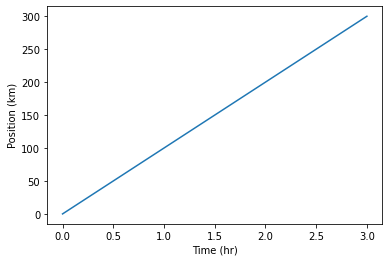

In [22]:
import matplotlib.pyplot as plt
time = [0, 1, 2, 3]
position = [0, 100, 200, 300]

plt.plot(time, position)
plt.xlabel('Time (hr)')
plt.ylabel('Position (km)')

[ 0.          0.45        1.11666667  1.75        2.43333333  3.15
  3.8         3.88333333  5.23333333  5.51666667  5.95        5.9
  8.35        7.73333333  8.36666667  9.5         9.58333333 10.63333333
 11.56666667 12.35       13.25       11.96666667 11.03333333 10.16666667
 10.          8.66666667  9.15        7.25        7.33333333  6.58333333
  6.06666667  5.95        5.11666667  3.6         3.3         3.56666667
  2.48333333  1.5         1.13333333  0.56666667]


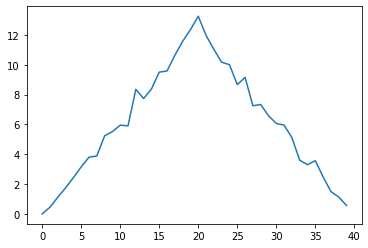

In [1]:
import numpy as np
import matplotlib.pyplot as plt
data = np.loadtxt(fname='data/inflammation-01.csv', delimiter=',')
ave_inflammation = np.mean(data, axis=0) #average of inflammation of each day
print(ave_inflammation)
ave_plot = plt.plot(ave_inflammation)
plt.show()

[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18. 19. 20. 19. 18. 17. 16. 15. 14. 13. 12. 11. 10.  9.  8.  7.  6.  5.
  4.  3.  2.  1.]


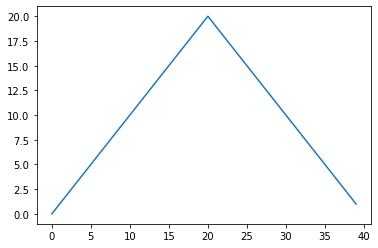

In [3]:
max_data = np.max(data, axis=0)
print(max_data)
max_plot = plt.plot(max_data)
print(max_plot)
plt.show()

### Grouping plots

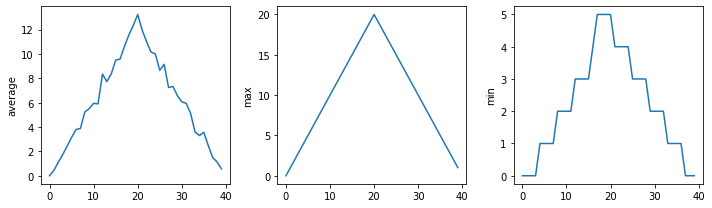

In [25]:
import matplotlib.pyplot as plt

data = np.loadtxt(fname='data/inflammation-01.csv', delimiter=',')

fig = plt.figure(figsize=(10.0, 3.0))
axes1 = fig.add_subplot(1, 3, 1) #nrows, ncols, index,
axes2 = fig.add_subplot(1, 3, 2)
axes3 = fig.add_subplot(1, 3, 3)

axes1.set_ylabel('average')
axes1.plot(np.mean(data, axis=0))

axes2.set_ylabel('max')
axes2.plot(np.max(data, axis=0))

axes3.set_ylabel('min')
axes3.plot(np.min(data, axis=0))
fig.tight_layout()
plt.savefig('inflammation.png') #saved to a file

In [26]:


plt.show()

### Exercise #3

Modify the program to display the three plots on top of one another instead of side by side.

In [27]:
#source: https://swcarpentry.github.io/python-novice-gapminder/09-plotting/index.html

### Visualizing Dataframes 

In [28]:
import pandas as pd
data = pd.read_csv('data/gapminder_gdp_oceania.csv', index_col='country')
data #GDP per capita

,gdpPercap_1952,gdpPercap_1957,gdpPercap_1962,gdpPercap_1967,gdpPercap_1972,gdpPercap_1977,gdpPercap_1982,gdpPercap_1987,gdpPercap_1992,gdpPercap_1997,gdpPercap_2002,gdpPercap_2007
country,,,,,,,,,,,,
Australia,10039.59564,10949.64959,12217.22686,14526.12465,16788.62948,18334.19751,19477.00928,21888.88903,23424.76683,26997.93657,30687.75473,34435.36744
New Zealand,10556.57566,12247.39532,13175.67800,14463.91893,16046.03728,16233.71770,17632.41040,19007.19129,18363.32494,21050.41377,23189.80135,25185.00911


In [7]:
import pandas as pd
data = pd.read_csv('data/gapminder_gdp_oceania.csv', index_col='country')
print(data.columns)

Index(['gdpPercap_1952', 'gdpPercap_1957', 'gdpPercap_1962', 'gdpPercap_1967',
       'gdpPercap_1972', 'gdpPercap_1977', 'gdpPercap_1982', 'gdpPercap_1987',
       'gdpPercap_1992', 'gdpPercap_1997', 'gdpPercap_2002', 'gdpPercap_2007'],
      dtype='object')


In [30]:
# Extract year from last 4 characters of each column name
# strip(), removes from the string the characters stated in the argument
print("\nGetting numbers")
years = data.columns.str.strip('gdpPercap_')
print(years)


Getting numbers
Index(['1952', '1957', '1962', '1967', '1972', '1977', '1982', '1987', '1992',
       '1997', '2002', '2007'],
      dtype='object')


In [31]:
# Convert year values to integers, saving results back to dataframe
print("\nConverting string numbers to int")
data.columns = years.astype(int)
print(data.columns)


Converting string numbers to int
Int64Index([1952, 1957, 1962, 1967, 1972, 1977, 1982, 1987, 1992, 1997, 2002,
            2007],
           dtype='int64')


In [32]:
data.loc['Australia']

1952    10039.59564
1957    10949.64959
1962    12217.22686
1967    14526.12465
1972    16788.62948
1977    18334.19751
1982    19477.00928
1987    21888.88903
1992    23424.76683
1997    26997.93657
2002    30687.75473
2007    34435.36744
Name: Australia, dtype: float64

<AxesSubplot:>

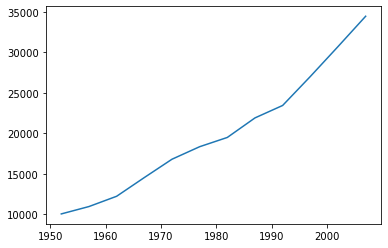

In [33]:
data.loc['Australia'].plot()

- By default, `DataFrame.plot` plots with the rows as the X axis (`axis=0`).
- We can transpose the data in order to plot multiple series.

Text(0, 0.5, 'GDP per capita')

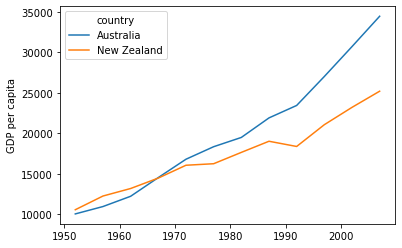

In [34]:
data.T.plot()
plt.ylabel('GDP per capita')

### Plot types:

- `line` : line plot (default)
- `bar` : vertical bar plot
- `barh` : horizontal bar plot
- `hist` : histogram
- `box` : box plot

More at: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html

Text(0, 0.5, 'GDP per capita')

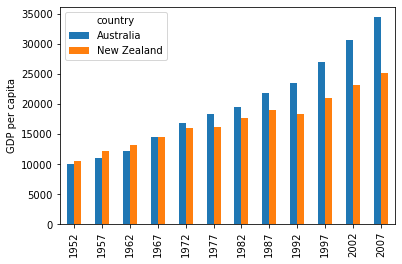

In [35]:
data.T.plot(kind='bar')
plt.ylabel('GDP per capita')

Text(0, 0.5, 'GDP per capita')

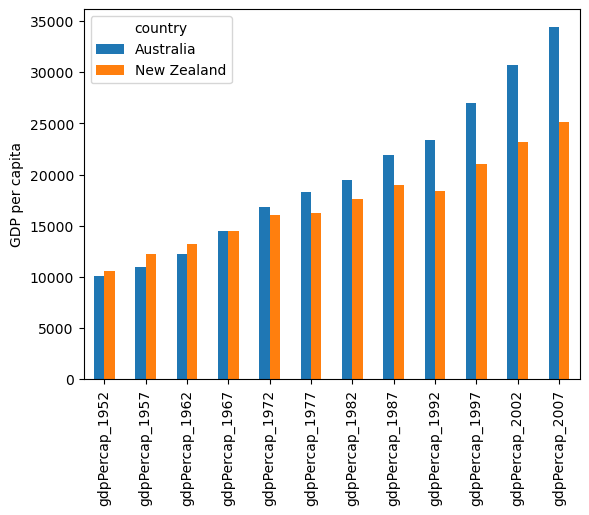

In [10]:
plt.style.use('default')
data.T.plot(kind='bar')
plt.ylabel('GDP per capita')

- More styles:
https://matplotlib.org/stable/gallery/style_sheets/style_sheets_reference.html

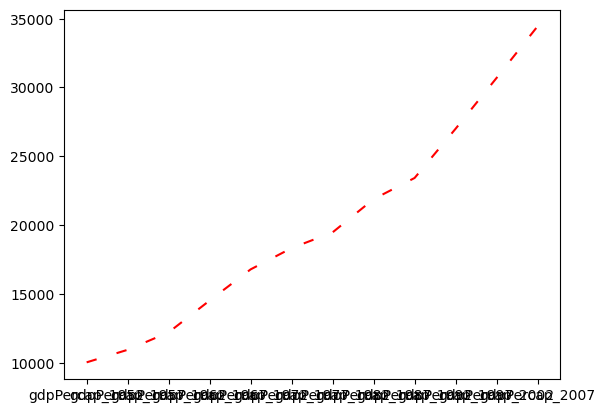

In [11]:
years = data.columns
gdp_australia = data.loc['Australia']

plt.plot(years, gdp_australia, linestyle=(0,(5,10)), color='red')

Linestyle:
- https://matplotlib.org/stable/gallery/lines_bars_and_markers/linestyles.html

### Exercise #4

Show an line diagram to compare GDP of China, and Syria in Asia.